In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
print("\n Jumlah Missing Values : ")
print(df.isnull().sum())


 Jumlah Missing Values : 
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


Pada df.isnull().sum() diatas terdapat 219 yang bernilai NaN, Namun pada dataset ini. Nilai Nan berarti bahwa tidak terdapat gangguan tidur yang dialami (insomnia ataupun Sleep Anea)

In [6]:
# Cek jumlah data yang duplikat (baris yang sama persis)
print("\nJumlah Data Duplikat:")
df.duplicated().sum()



Jumlah Data Duplikat:


np.int64(0)

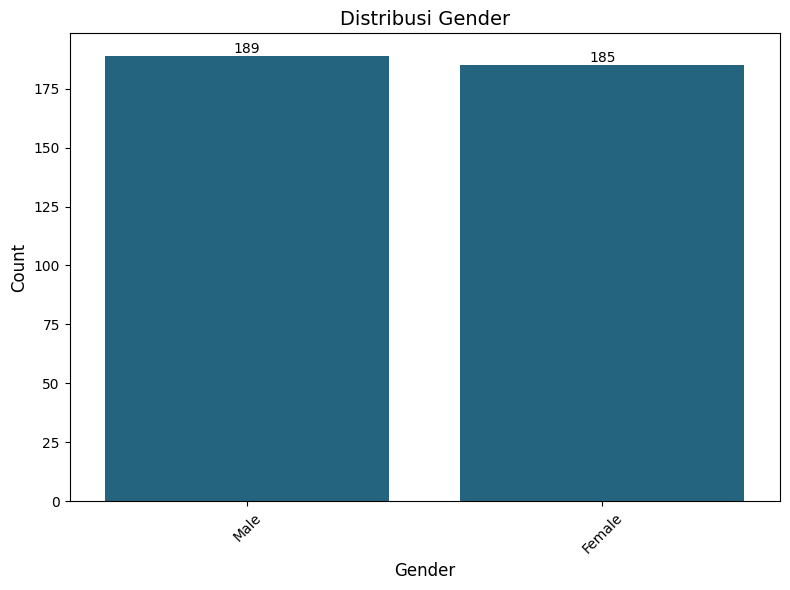

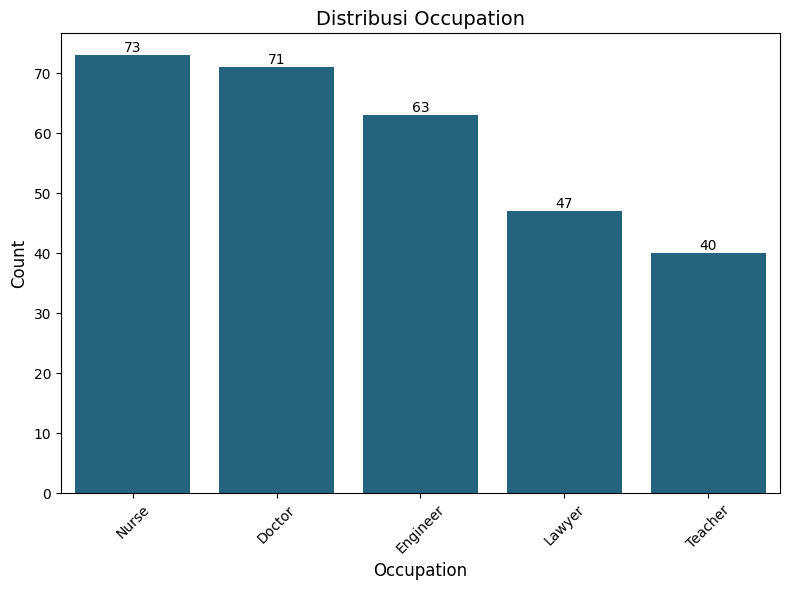

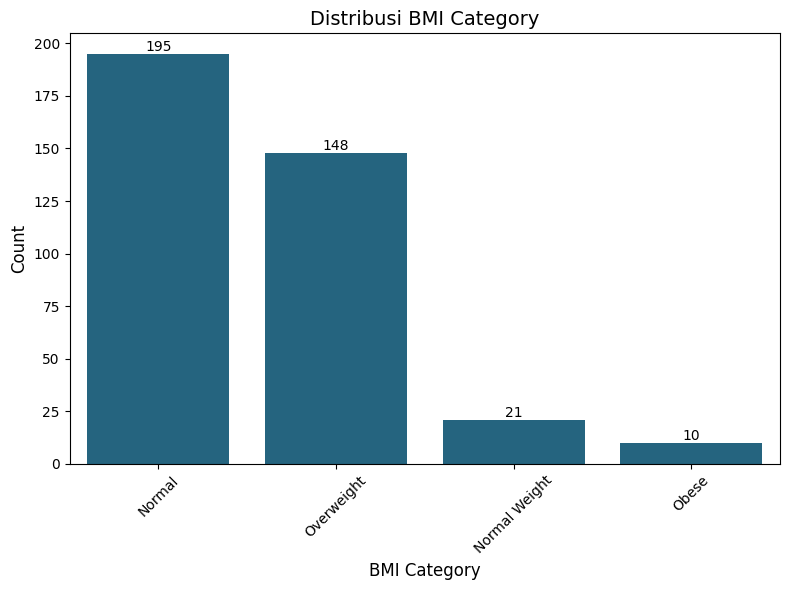

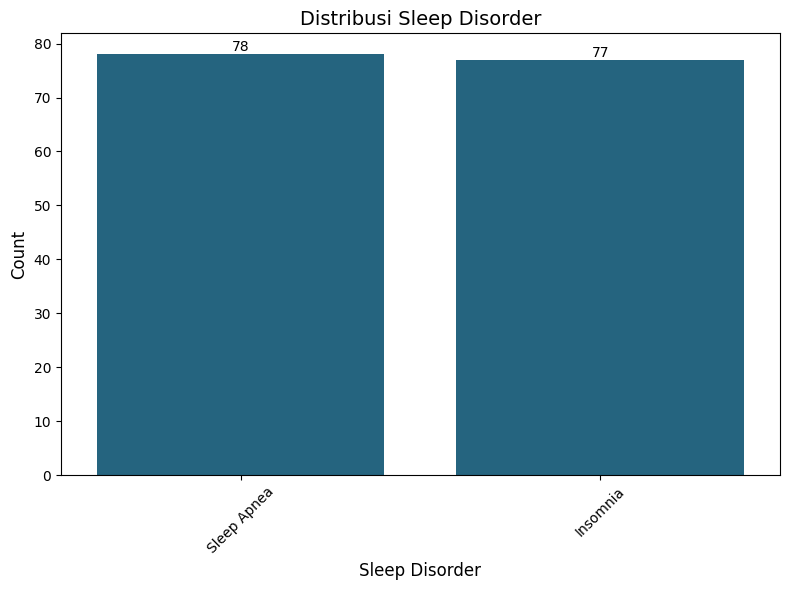

In [7]:
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for feature in categorical_cols:
    plt.figure(figsize=(8, 6))

    # Ambil hanya 16 kategori paling sering muncul
    top_categories = df[feature].value_counts().nlargest()

    ax = sns.barplot(x=top_categories.index, y=top_categories.values, color="#166A8E")
    ax.bar_label(ax.containers[0], label_type='edge')  

    plt.title(f'Distribusi {feature}', fontsize=14)
    plt.xticks(rotation=45) 
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()

    plt.show()

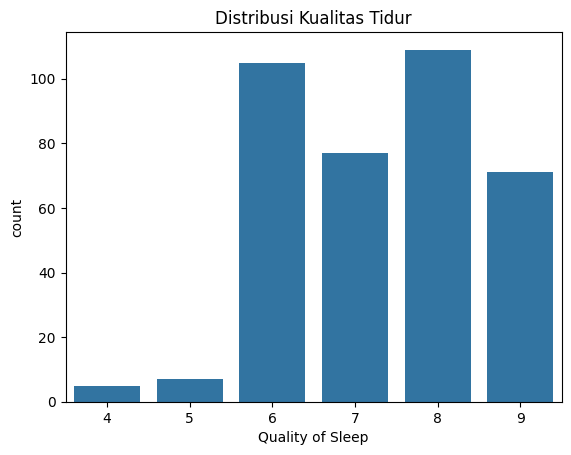

In [8]:
sns.countplot(data=df, x='Quality of Sleep')
plt.title('Distribusi Kualitas Tidur')
plt.show()

Pada distribusi kualitar tidur terdapat orang dengan tidur 4 sampai 9 Jam. Pada distribusi ini, kebanyakan orang sudah memiliki waktu tidur yang cukup.

In [9]:
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(8, 4 * len(numerical_cols)))

# Plot boxplot untuk setiap kolom numerik
for ax, col in zip(axes, numerical_cols):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot untuk {col}')

plt.tight_layout()
plt.show()

NameError: name 'numerical_cols' is not defined